## Homework #7, Problem 7.4a
I'll be using Müller's method to determine the positve real root of $$f(x)=x^3-x^2+2x-2$$

In [74]:
import numpy as np
np.set_printoptions(precision = 25)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
colors = ['red', 'blue', 'green', 'black', 'orange', 'purple']

# Generic Function to create arbitrary plots with arbitrary subplots and functions
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1, size=(18, 14)):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='upper right')
    
    plt.show()

### Function Definition of Müller's Method of Root Finding

In [79]:
def muller(func, x_vals, epsilon=1e-10, max_iters=1000):
    iters = 0
    d_x   = []
    
    while True:
        iters = iters + 1
        h_0   = x_vals[-2] - x_vals[-3]
        h_1   = x_vals[-1] - x_vals[-2]
        d_0   = (func(x_vals[-2]) - func(x_vals[-3])) / h_0
        d_1   = (func(x_vals[-1]) - func(x_vals[-2])) / h_1
        a     = (d_1 - d_0) / (h_1 + h_0)
        b     = a * h_1 + d_1
        c     = func(x_vals[-1])
        rad   = np.sqrt(b * b - 4 * a * c + 0j)
        den   = (b + rad) if np.abs(b + rad) > np.abs(b - rad) else (b - rad)
        d_x.append(-2 * c / den)
        x_vals.append(x_vals[-1] + d_x[-1])
        if np.abs(d_x[-1]) < abs(epsilon * x_vals[-1]) or iters > max_iters:
            break
        
    return (x_vals, iters)

### The Function, $f(x)$

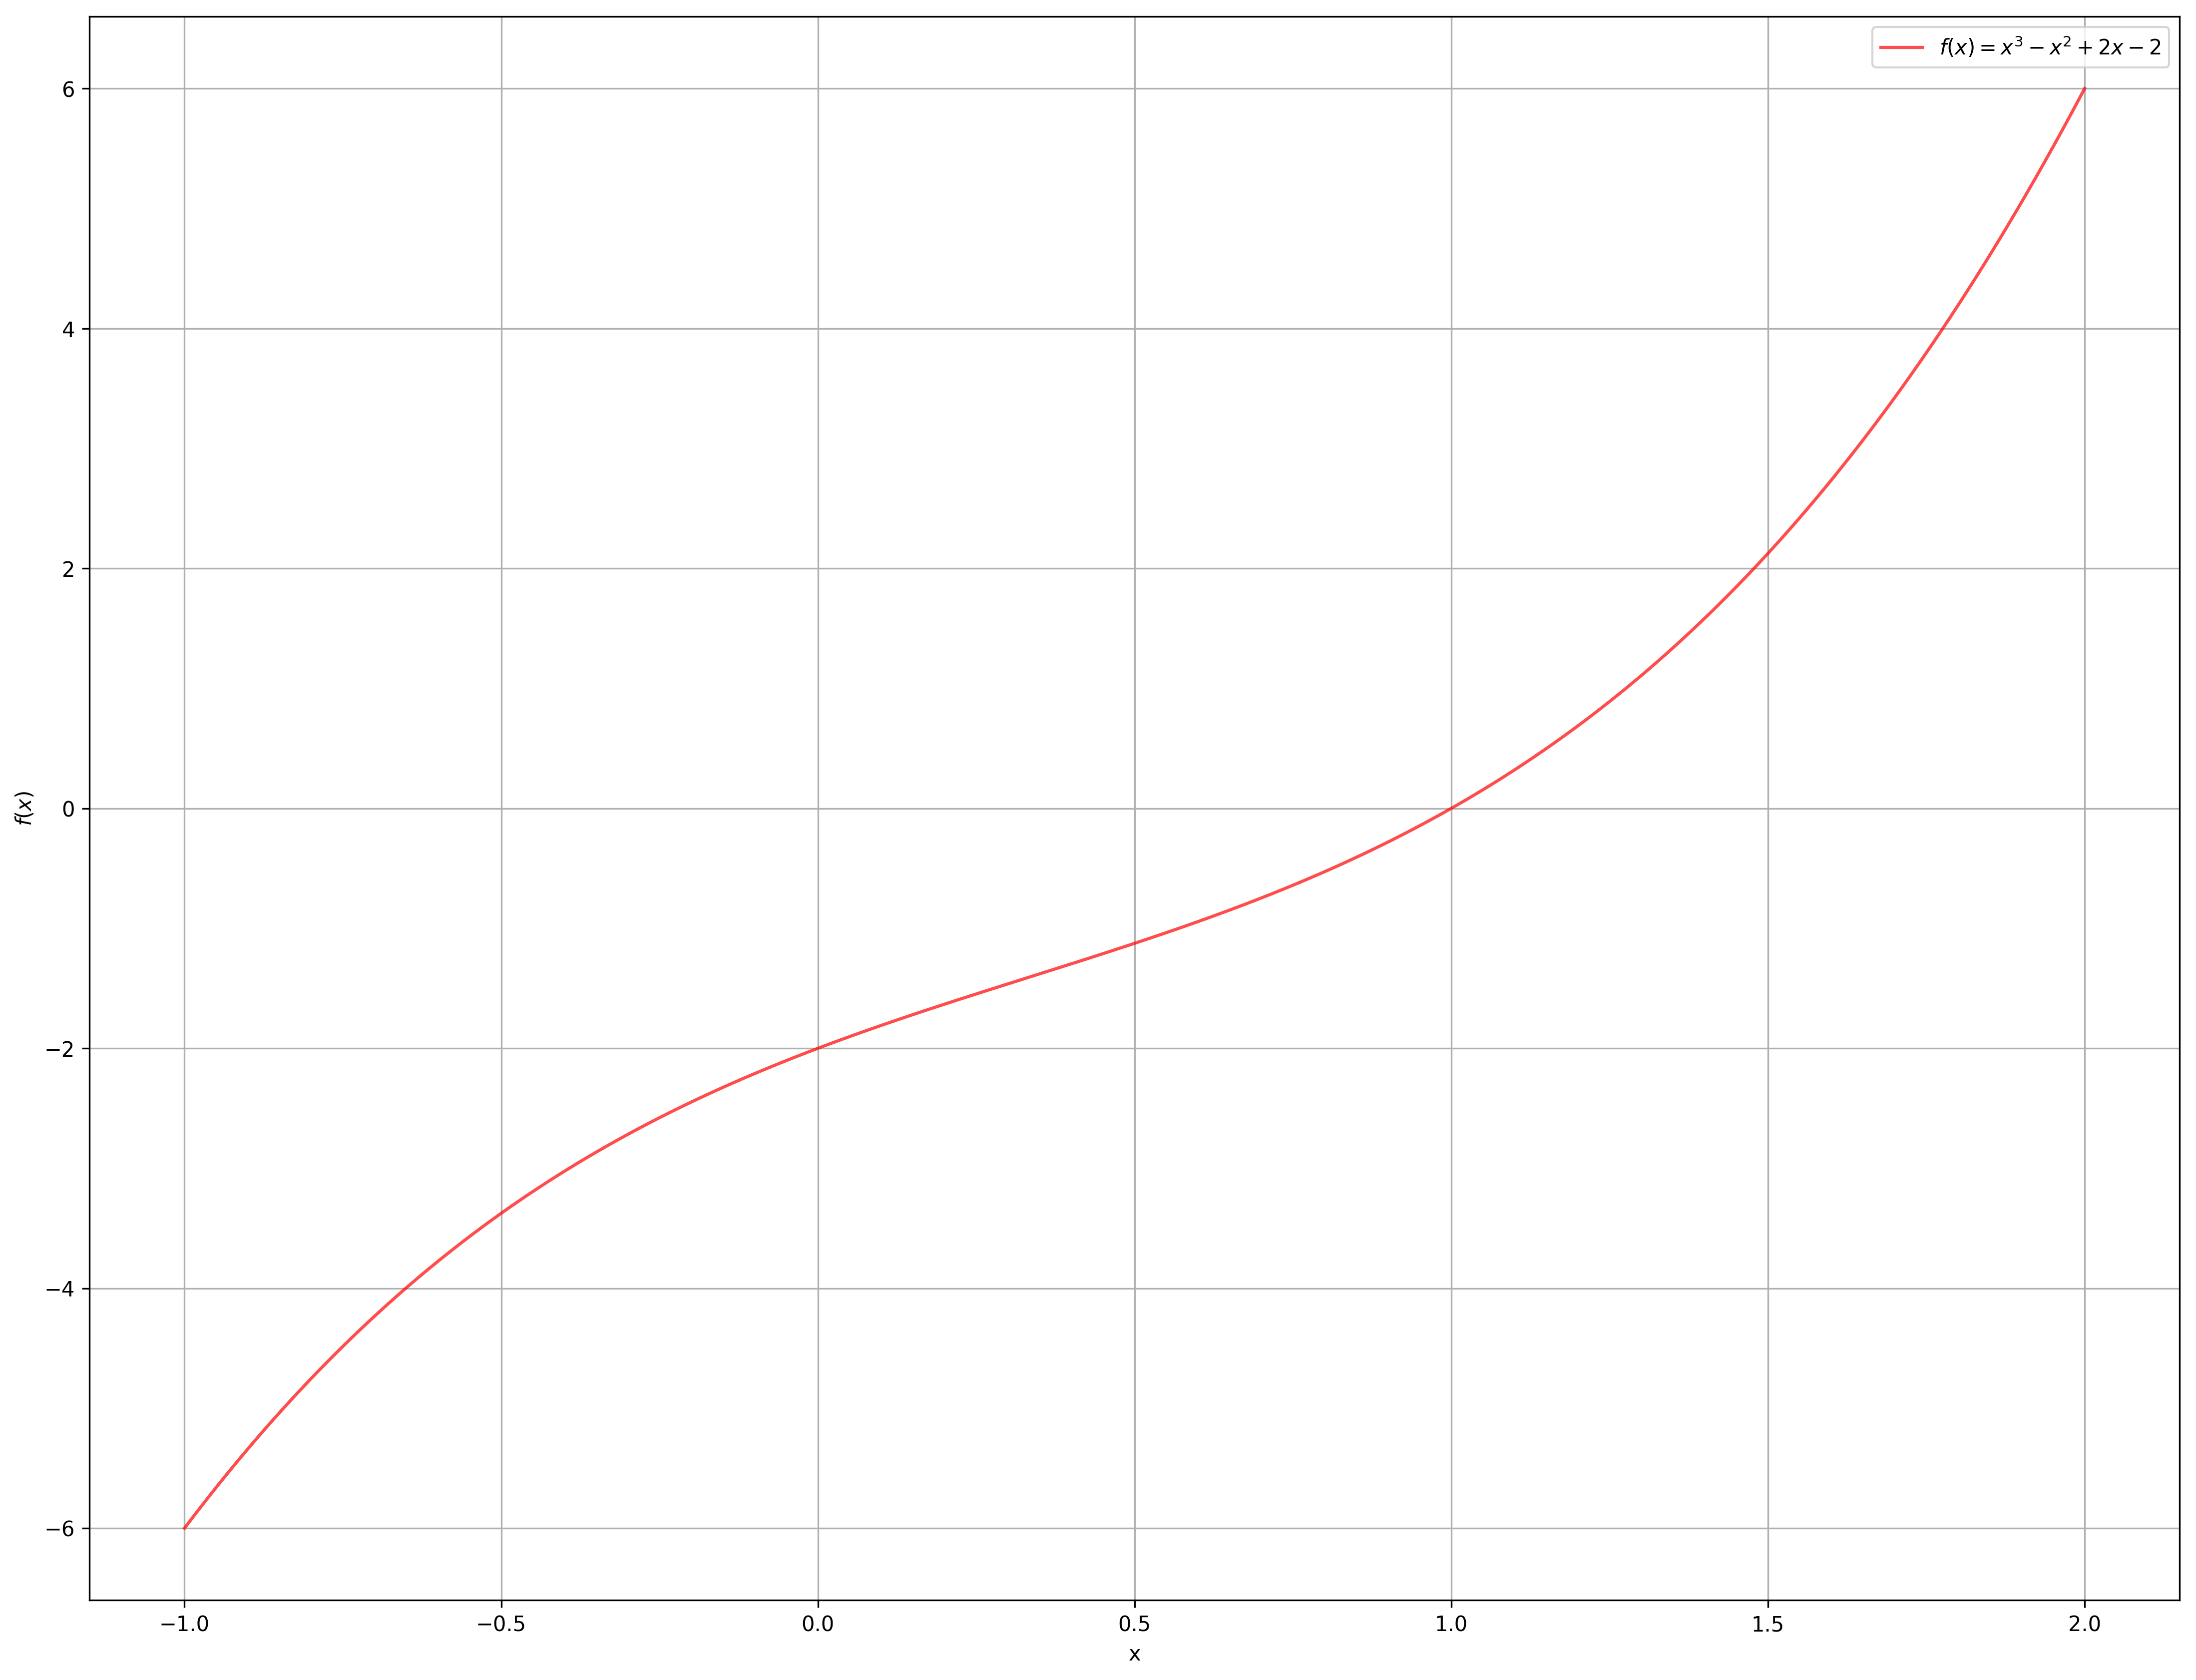

In [11]:
# Function f(x)
def f(x):
    return (x ** 3 - x ** 2 + 2 * x - 2)

create_plot([np.arange(-1, 2 + 0.0001, 0.0001)],
            [(f(np.arange(-1, 2 + 0.0001, 0.0001)), )],
            ["x"], ["$f(x)$"],
            [("$f(x)=x^3-x^2+2x-2$", )], 1)

### Real Root of $f(x)$, Müller's Method

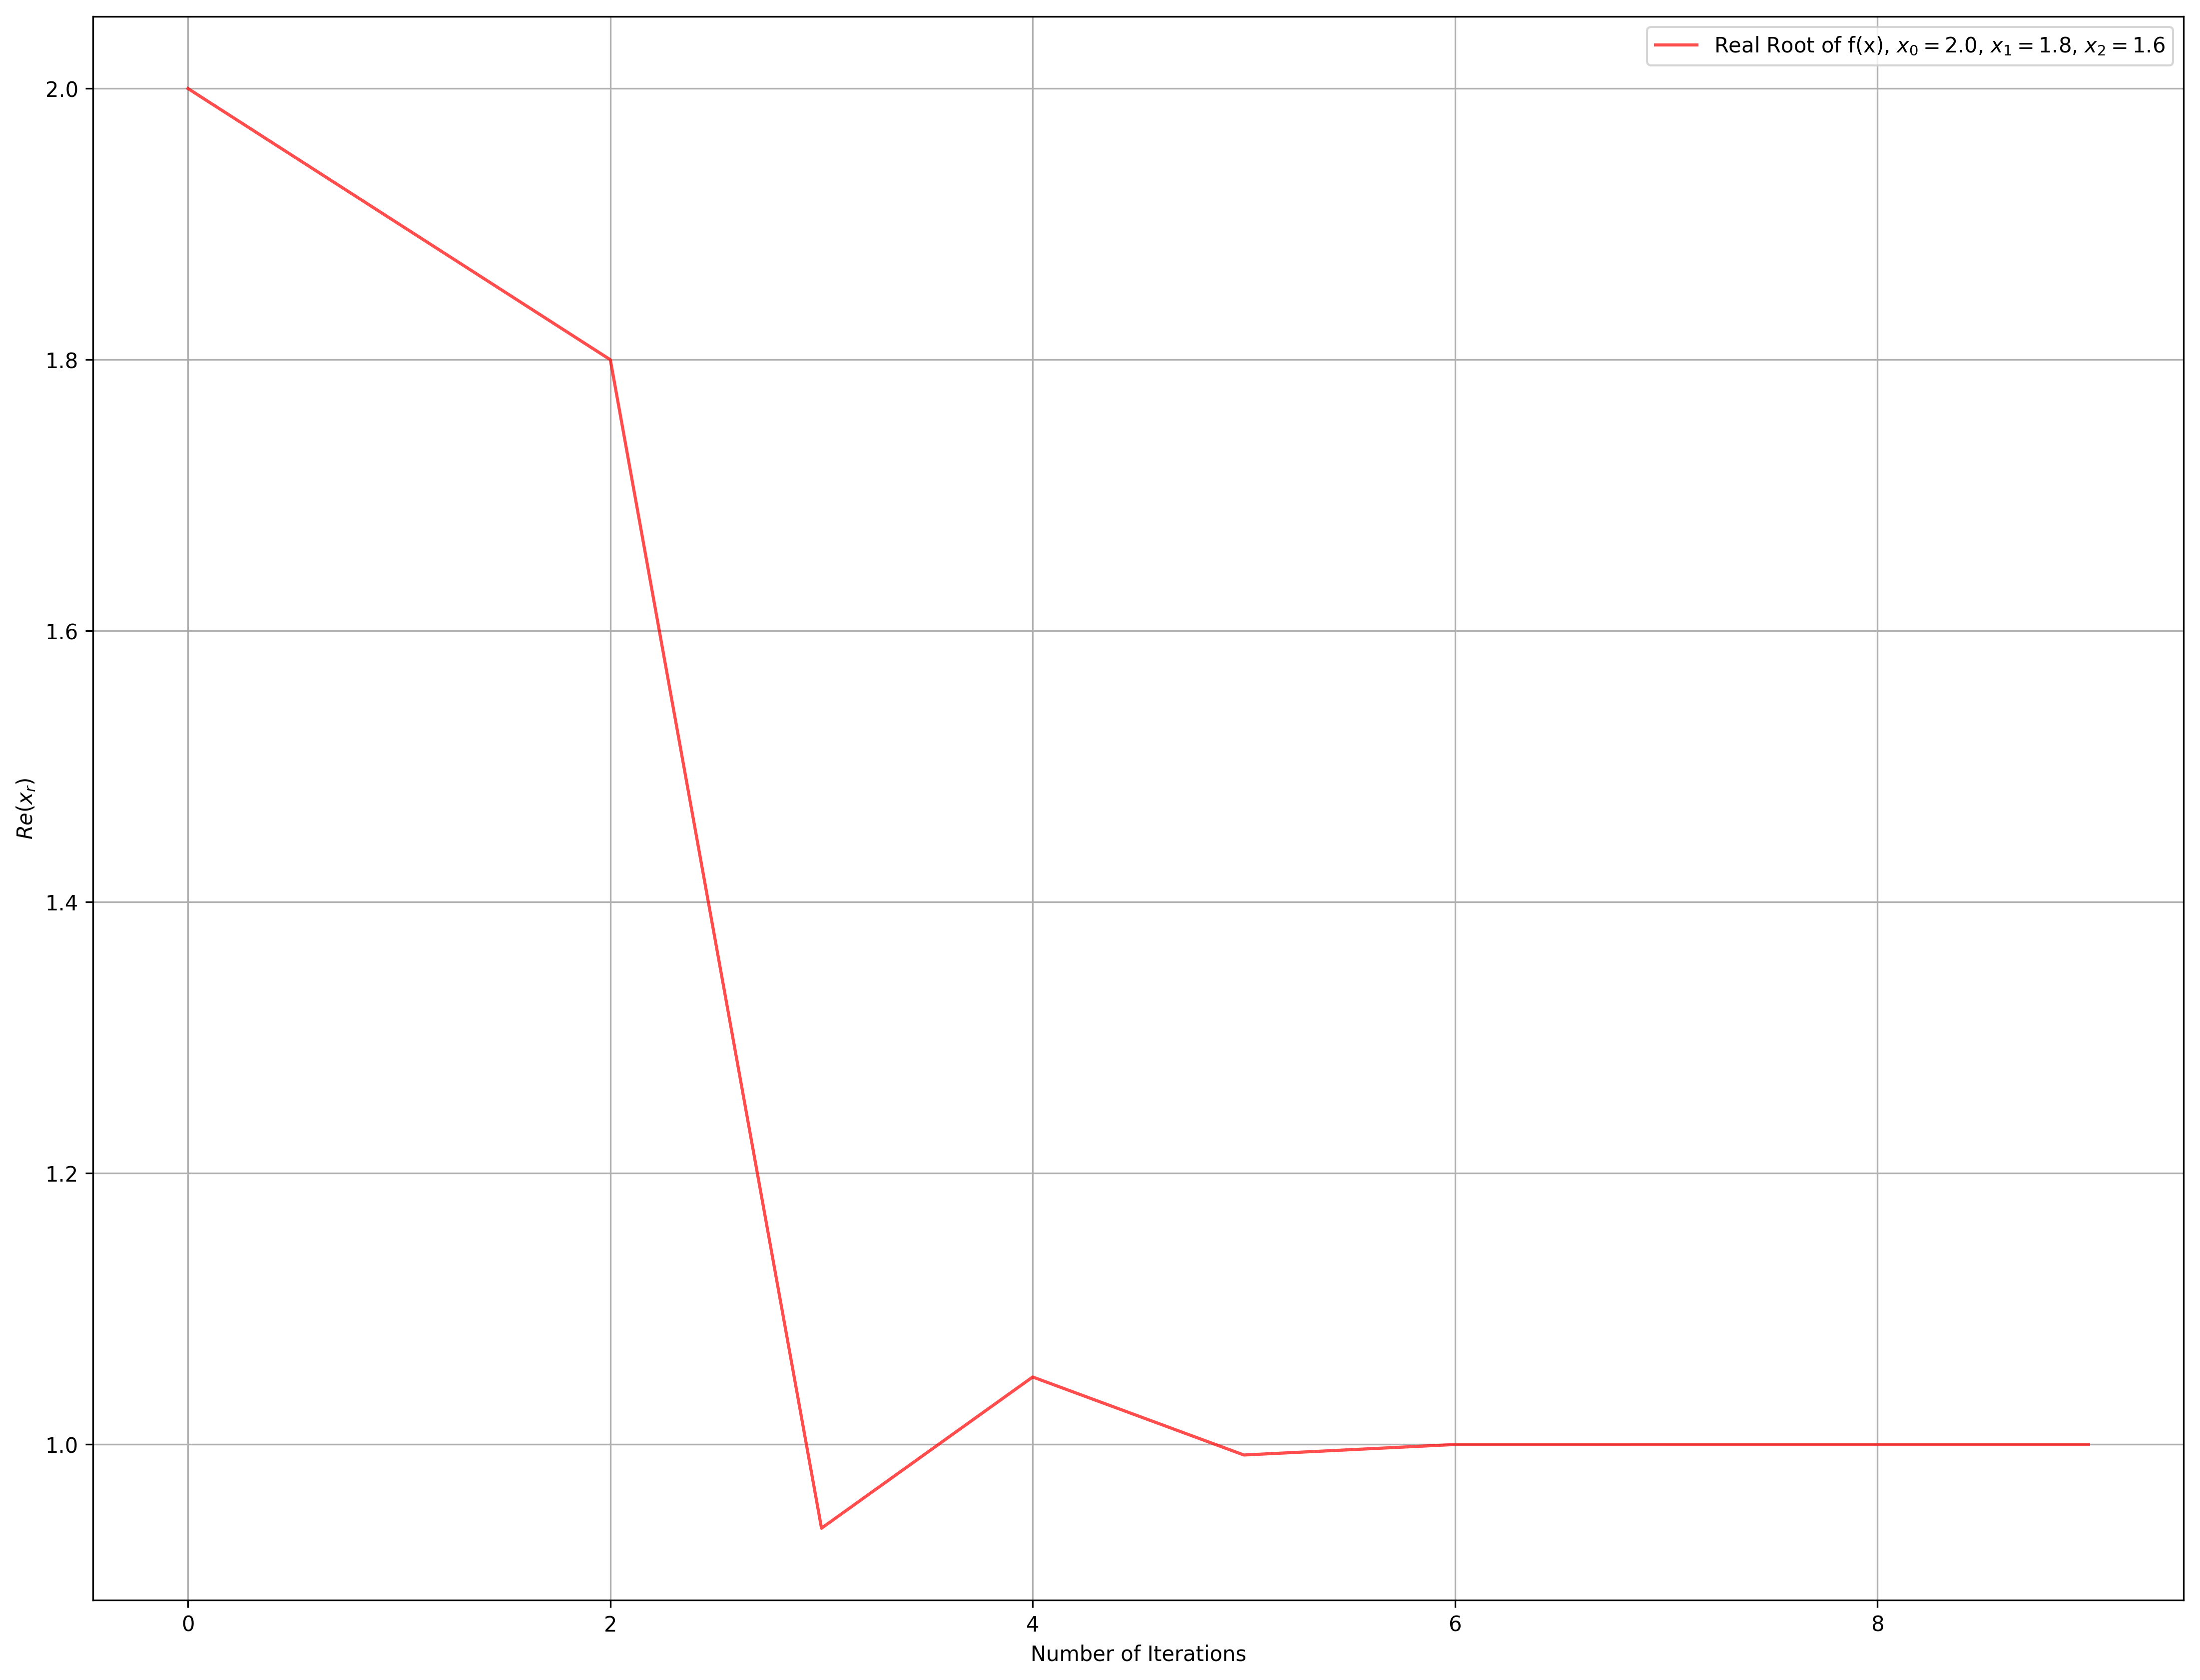

In [86]:
root, iters = muller(f, [2.0, 1.9, 1.8])
create_plot([np.arange(iters+3)],
            [(np.real(root), )],
            ["Number of Iterations"],
            ["$Re(x_r)$"],
            [("Real Root of f(x), $x_0=2.0$, $x_1=1.8$, $x_2=1.6$", )], 1)

In [115]:
print ("Real Root of f(x)")
print (np.c_[np.real(root)], "<", "-" * 10, "Final Root")

Real Root of f(x)
[[2.                ]
 [1.9               ]
 [1.8               ]
 [0.9382978723404177]
 [1.0498100952381508]
 [0.9922884485121309]
 [1.0000180821157638]
 [1.0000000211548075]
 [0.999999999999974 ]
 [1.                ]] < ---------- Final Root


### Imaginary Root(s) of $f(x)$, Müller's Method

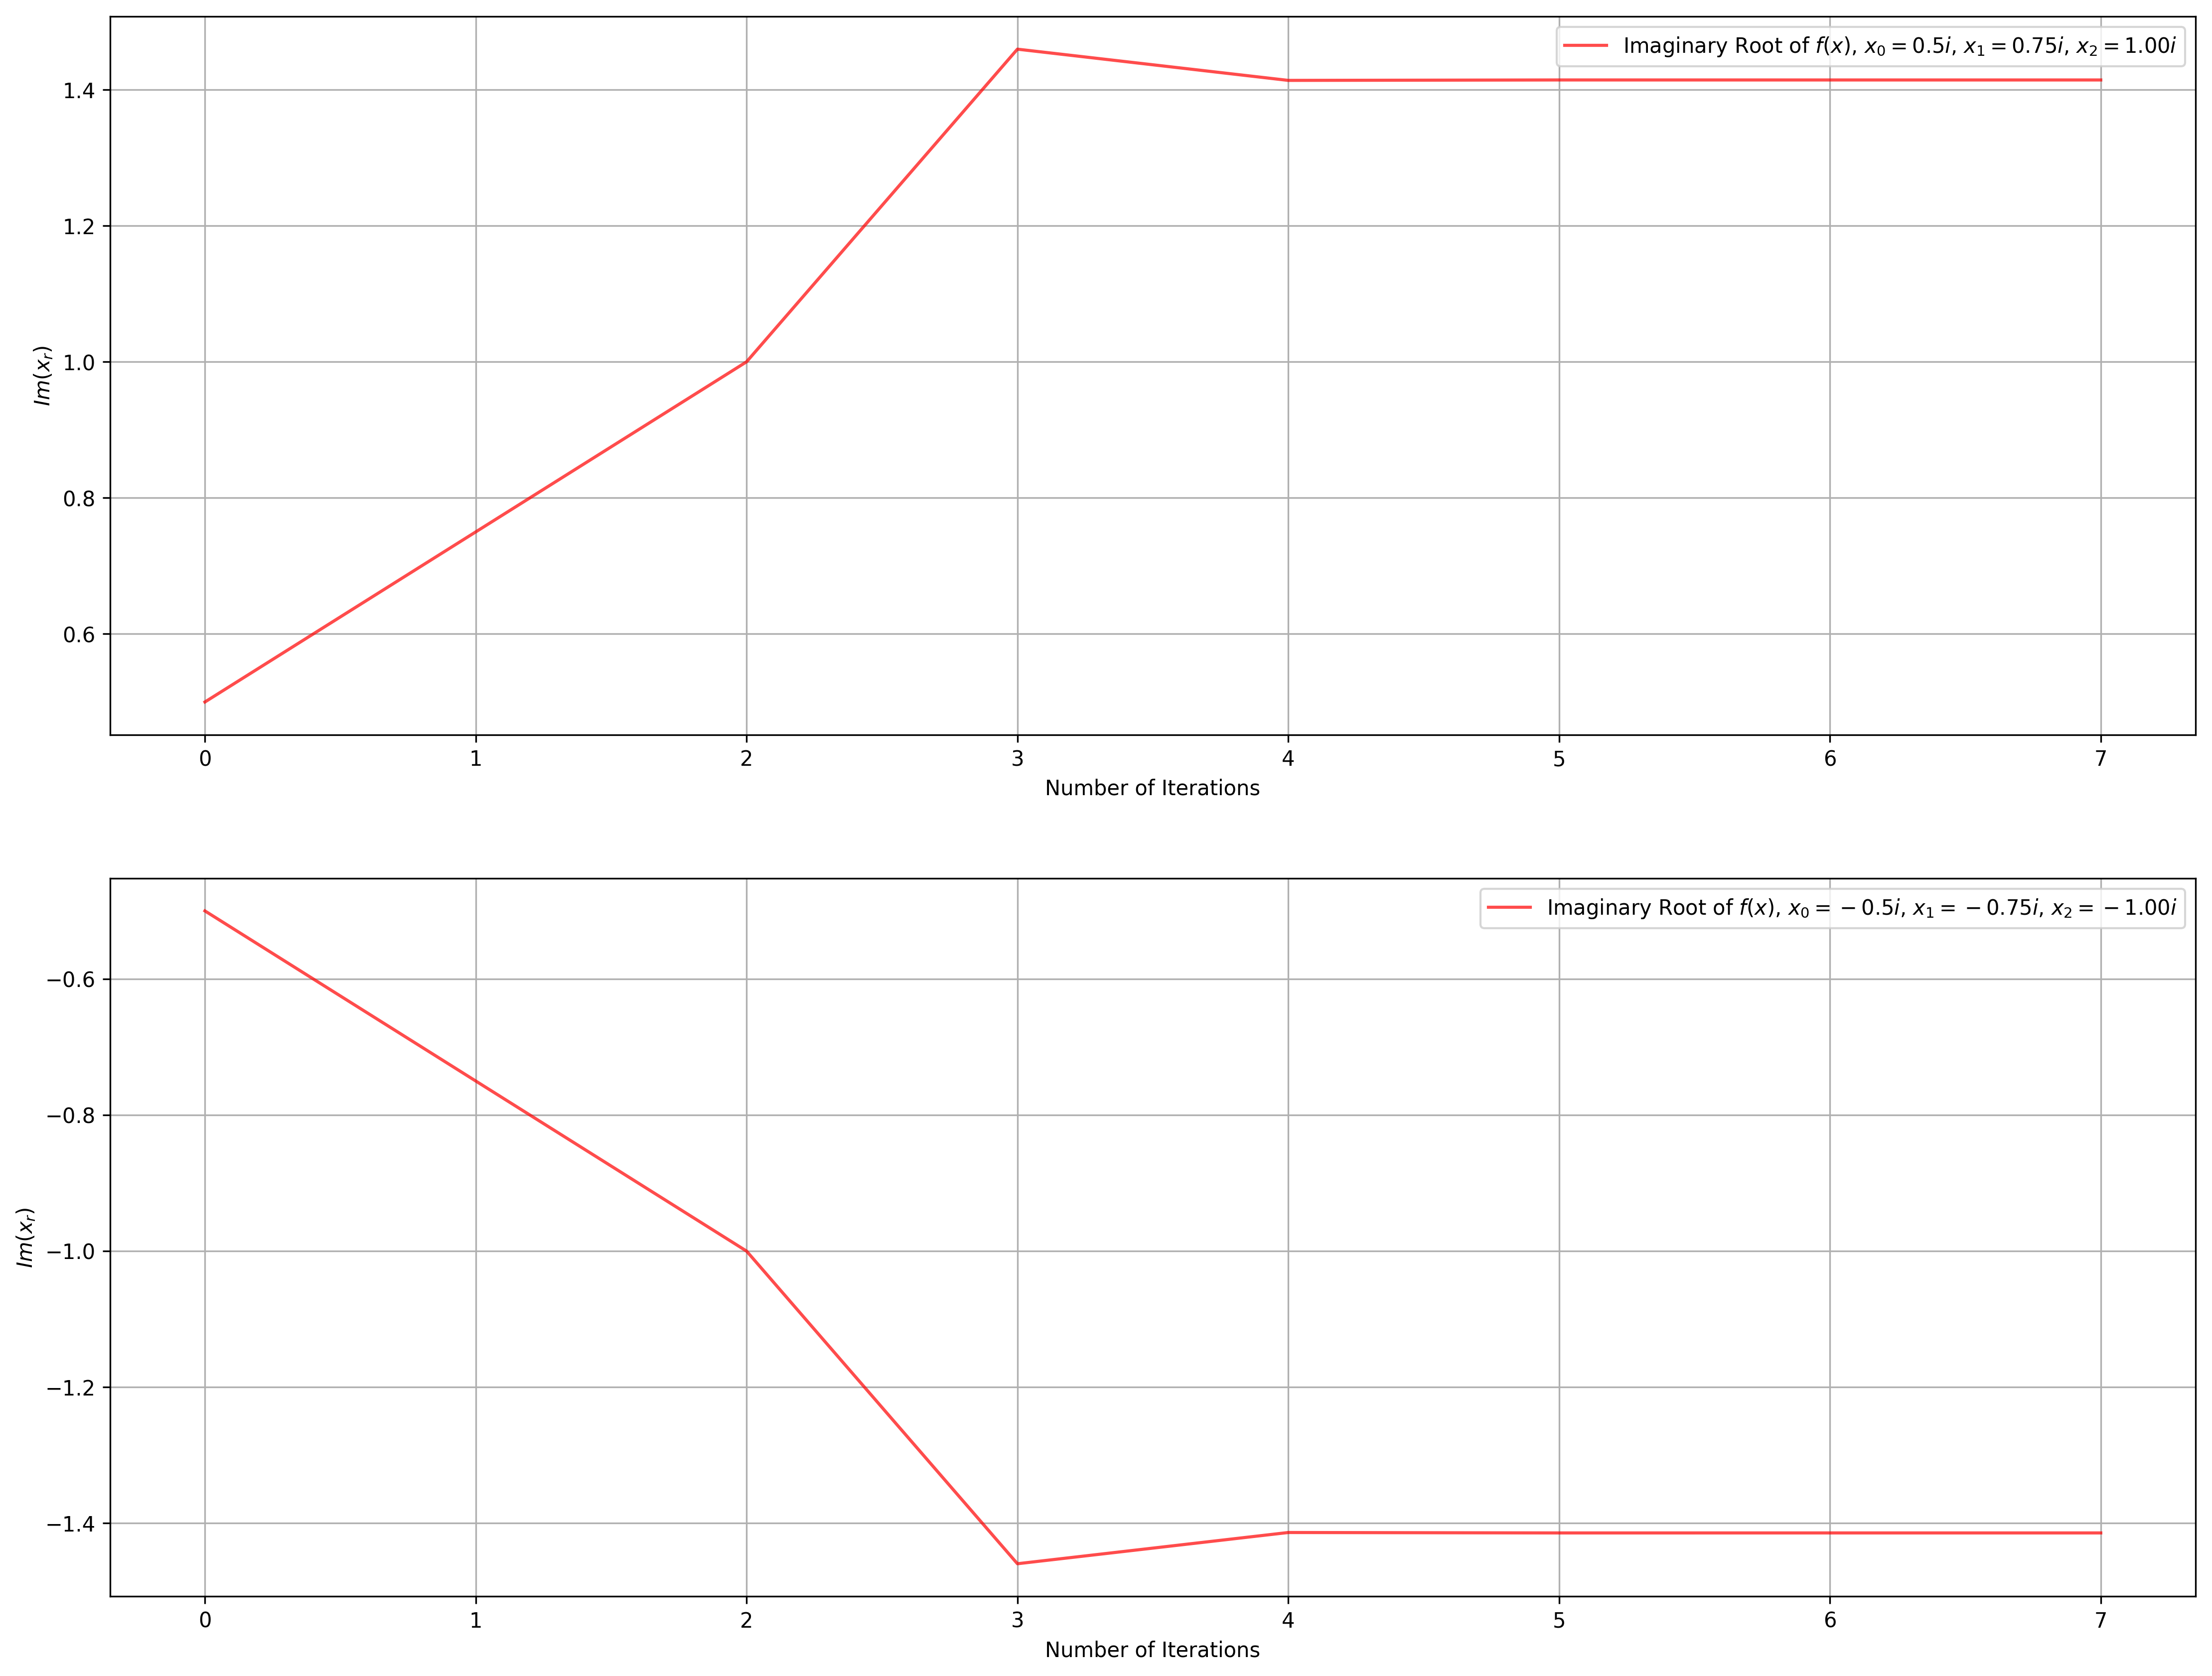

In [94]:
root_im_a, iters_im_a = muller(f, [0.5j, 0.75j, 1.00j], epsilon=1e-5)
root_im_b, iters_im_b = muller(f, [-0.5j, -0.75j, -1.00j], epsilon=1e-5)
create_plot([np.arange(iters_im_a+3), np.arange(iters_im_b+3)],
            [(np.imag(root_im_a), ), (np.imag(root_im_b), )],
            ["Number of Iterations", "Number of Iterations"],
            ["$Im(x_r)$", "$Im(x_r)$"],
            [("Imaginary Root of $f(x)$, $x_0=0.5i$, $x_1=0.75i$, $x_2=1.00i$", ),
             ("Imaginary Root of $f(x)$, $x_0=-0.5i$, $x_1=-0.75i$, $x_2=-1.00i$", )], 2)

In [121]:
print ("Imaginary Roots of f(x)\n", "-" * 45)
print (np.c_[root_im_a], "< ----- Final Root\n", "-" * 45, "\n", np.c_[root_im_b], "< ----- Final Root")

Imaginary Roots of f(x)
 ---------------------------------------------
[[ 0.0000000000000000e+00+0.5j               ]
 [ 0.0000000000000000e+00+0.75j              ]
 [ 0.0000000000000000e+00+1.j                ]
 [ 4.3568627303904379e-02+1.4594888183991734j]
 [-3.6346312888164214e-03+1.4136014424157552j]
 [-6.9071997750034045e-06+1.4142318617754477j]
 [ 6.0758060340553223e-10+1.4142135616760219j]
 [ 1.2350936370735874e-17+1.4142135623730951j]] < ----- Final Root
 --------------------------------------------- 
 [[-0.0000000000000000e+00-0.5j               ]
 [-0.0000000000000000e+00-0.75j              ]
 [-0.0000000000000000e+00-1.j                ]
 [ 4.3568627303904379e-02-1.4594888183991734j]
 [-3.6346312888164214e-03-1.4136014424157552j]
 [-6.9071997750034045e-06-1.4142318617754477j]
 [ 6.0758060340553223e-10-1.4142135616760219j]
 [ 1.2350936370735874e-17-1.4142135623730951j]] < ----- Final Root


### Conclusion
Trying to find both types of roots, both real and imaginary, the Müller method works perfectly. I did notice that for the imaginary roots, the initial values needed to be quite close in order for the algorithm to converge on the _imaginary_ roots, and not the real ones. Still, one algorithm that is versatile enough to find both types of roots is incredible useful, even if your initial guesses need to be quite close.